<a href="https://colab.research.google.com/github/akheel143/Age-Gender-Ethnicity-Prediction-/blob/main/Age%2C_Gender_%26_Ethnicity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_datasets'

In [4]:
%cd /content/drive/MyDrive/kaggle_datasets

/content/drive/MyDrive/kaggle_datasets


In [ ]:
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 93% 59.0M/63.2M [00:00<00:00, 86.8MB/s]
100% 63.2M/63.2M [00:00<00:00, 108MB/s] 


In [1]:
import pandas as pd
import numpy as np

In [2]:
Path=pd.read_csv('/content/drive/MyDrive/kaggle_datasets/age-gender-and-ethnicity-face-data-csv.zip')

In [3]:
print(Path.head(-1))

       age  ...                                             pixels
0        1  ...  129 128 128 126 127 130 133 135 139 142 145 14...
1        1  ...  164 74 111 168 169 171 175 182 184 188 193 199...
2        1  ...  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        1  ...  193 197 198 200 199 200 202 203 204 205 208 21...
4        1  ...  202 205 209 210 209 209 210 211 212 214 218 21...
...    ...  ...                                                ...
23699   99  ...  206 183 141 116 117 120 110 103 104 111 111 11...
23700   99  ...  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701   99  ...  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702   99  ...  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703   99  ...  45 108 120 156 206 197 140 180 191 199 204 207...

[23704 rows x 5 columns]


In [4]:
Path = Main_G_A_E_Path.drop("img_name",axis=1)

In [5]:
print(Path.head())

   age  ethnicity  gender                                             pixels
0    1          2       0  129 128 128 126 127 130 133 135 139 142 145 14...
1    1          2       0  164 74 111 168 169 171 175 182 184 188 193 199...
2    1          2       0  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    1          2       0  193 197 198 200 199 200 202 203 204 205 208 21...
4    1          2       0  202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
Path["age"] = Main_G_A_E_Path["age"].apply(lambda x: "Teen" if x < 18 else("Middle" if 18 <= x < 55 else "Old"))

In [7]:
print(Path["age"].value_counts())

Middle    15830
Teen       4233
Old        3642
Name: age, dtype: int64


In [8]:
print(Path.head(-1))

        age  ...                                             pixels
0      Teen  ...  129 128 128 126 127 130 133 135 139 142 145 14...
1      Teen  ...  164 74 111 168 169 171 175 182 184 188 193 199...
2      Teen  ...  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3      Teen  ...  193 197 198 200 199 200 202 203 204 205 208 21...
4      Teen  ...  202 205 209 210 209 209 210 211 212 214 218 21...
...     ...  ...                                                ...
23699   Old  ...  206 183 141 116 117 120 110 103 104 111 111 11...
23700   Old  ...  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701   Old  ...  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702   Old  ...  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703   Old  ...  45 108 120 156 206 197 140 180 191 199 204 207...

[23704 rows x 4 columns]


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
Encoder_Function = LabelEncoder()

In [11]:
print("MAIN:")
print(Path["age"].value_counts())
print("---" * 20)
Path["age"] = Encoder_Function.fit_transform(Path["age"])
print("TRANSFORMED:")
print(Path["age"].value_counts())

MAIN:
Middle    15830
Teen       4233
Old        3642
Name: age, dtype: int64
------------------------------------------------------------
TRANSFORMED:
0    15830
2     4233
1     3642
Name: age, dtype: int64


In [12]:
print(Path.head())

   age  ethnicity  gender                                             pixels
0    2          2       0  129 128 128 126 127 130 133 135 139 142 145 14...
1    2          2       0  164 74 111 168 169 171 175 182 184 188 193 199...
2    2          2       0  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    2          2       0  193 197 198 200 199 200 202 203 204 205 208 21...
4    2          2       0  202 205 209 210 209 209 210 211 212 214 218 21...


In [13]:
Path["pixels"] = Main_G_A_E_Path["pixels"].apply(lambda x: np.array(x.split(),dtype="float32"))
Path["pixels"] = Main_G_A_E_Path["pixels"] / 255.

In [14]:
print(Path.head())

   age  ethnicity  gender                                             pixels
0    2          2       0  [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1    2          2       0  [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2    2          2       0  [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3    2          2       0  [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4    2          2       0  [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...


In [15]:
print("Single Image Shape:")
print(Path["pixels"][0].shape)
print("Total Shape:")
print(Path["pixels"].shape)

Single Image Shape:
(2304,)
Total Shape:
(23705,)


In [16]:
X_Train = np.zeros(shape=(23705,2304))

for indexing in range(len(Path["pixels"])):
    X_Train[indexing] = Path["pixels"][indexing]


In [17]:
print(X_Train.shape)

(23705, 2304)


In [50]:
X_Train = X_Train.reshape(-1,48,48,1)

In [51]:
X=X_Train

In [52]:
Y=Y = Main_G_A_E_Path.iloc[:,:-1].values

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42,shuffle=True)
x_train[0].shape

(48, 48, 1)

In [82]:
from numpy import asarray

In [85]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test= np.asarray(y_test)

In [86]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21334, 48, 48, 1)
(2371, 48, 48, 1)
(21334, 3)
(2371, 3)


In [87]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=(48,48,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())

Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())


Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(64,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(3,activation="softmax"))

In [88]:
Model.compile(optimizer='adam',loss='msle',metrics=['accuracy'])


In [103]:
history = Model.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      batch_size=12,
                      epochs=50)

Epoch 1/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1986 - accuracy: 0.6669 - val_loss: 0.2000 - val_accuracy: 0.6360
Epoch 2/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1965 - accuracy: 0.6752 - val_loss: 0.1897 - val_accuracy: 0.7014
Epoch 3/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1950 - accuracy: 0.6754 - val_loss: 0.1868 - val_accuracy: 0.7077
Epoch 4/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1939 - accuracy: 0.6843 - val_loss: 0.1858 - val_accuracy: 0.7410
Epoch 5/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1935 - accuracy: 0.6852 - val_loss: 0.1931 - val_accuracy: 0.6984
Epoch 6/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1938 - accuracy: 0.6818 - val_loss: 0.1882 - val_accuracy: 0.7440
Epoch 7/50
1778/1778 [==============================] - 10s 6ms/step - loss: 0.1911 - accuracy: 0.6908 - val_loss: 0.1869 - val_ac

In [104]:
Results = Model.evaluate(x_test,y_test)

75/75 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.7360


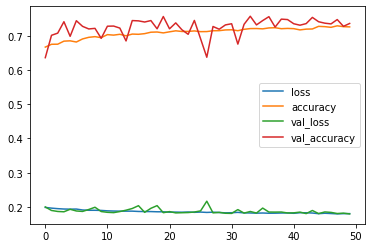

In [105]:
Graph = pd.DataFrame(CNN_Model.history)
Graph.plot()